原始数据:
行索引: ['R1 (Bedroom 1)', 'R2 (Bedroom 2)', 'R3 (Bedroom 3)', 'R4 (Bath 1)', 'R5 (Bath 2)', 'R6 (Hall+Foyer)', 'R7 (Kitchen)', 'R8 (Dining Room)', 'R9 (Living Room)', 'R10 (OUTSET)']
列名: ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10']

修复后的列名: ['R1 (Bedroom 1)', 'R2 (Bedroom 2)', 'R3 (Bedroom 3)', 'R4 (Bath 1)', 'R5 (Bath 2)', 'R6 (Hall+Foyer)', 'R7 (Kitchen)', 'R8 (Dining Room)', 'R9 (Living Room)', 'R10 (OUTSET)']


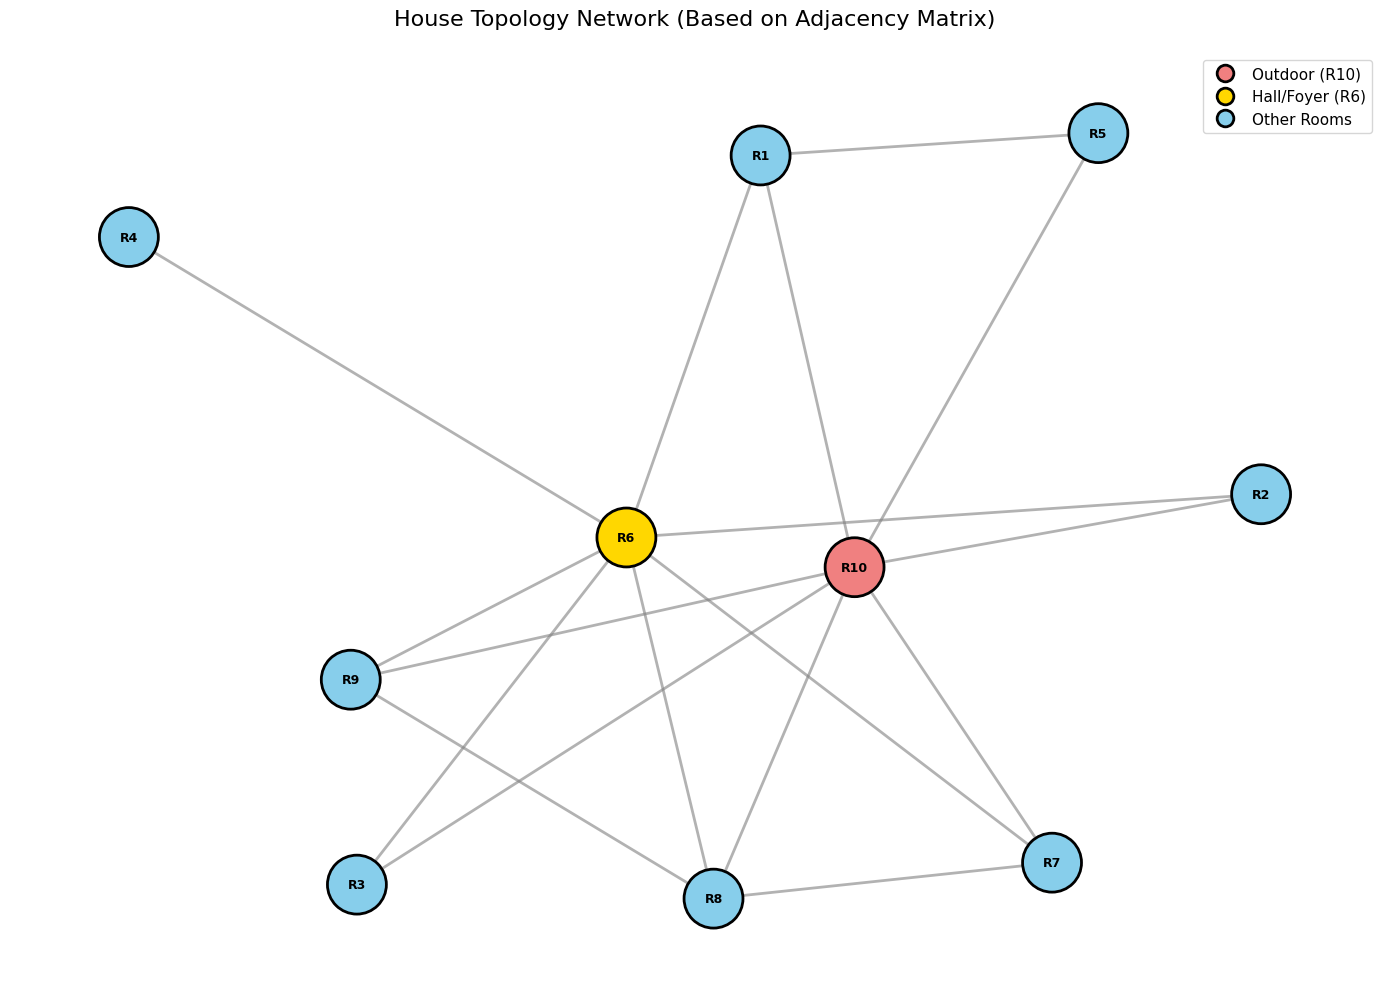


📊 拓扑统计:
节点数: 10
边数: 17
平均度数: 3.40


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os

def draw_house_topology(csv_path):
    # 检查文件是否存在
    if not os.path.exists(csv_path):
        print(f"错误：文件 '{csv_path}' 不存在！")
        print(f"当前工作目录：{os.getcwd()}")
        print(f"\n请确保：")
        print(f"1. CSV文件存在于正确路径")
        print(f"2. 文件名拼写正确")
        print(f"3. 或使用绝对路径：如 'code/adjacency_matrix.csv'")
        return
    
    # 1. 读取CSV文件
    # index_col=0 表示第一列作为行索引
    df = pd.read_csv(csv_path, index_col=0)
    
    print("原始数据:")
    print(f"行索引: {df.index.tolist()}")
    print(f"列名: {df.columns.tolist()}")
    
    # 🔧 修复：确保列名与行索引一致
    # 将列名设置为与行索引相同
    df.columns = df.index
    
    print(f"\n修复后的列名: {df.columns.tolist()}")
    
    # 2. 从邻接矩阵创建无向图
    G = nx.from_pandas_adjacency(df)
    
    # 3. 设置绘图风格
    plt.figure(figsize=(16, 10))
    
    # 使用 spring_layout 布局，让节点自动排布，体现出核心枢纽结构
    pos = nx.spring_layout(G, seed=42, k=1.5) 
    
    # 4. 定义节点颜色
    # R10 是室外，用不同颜色标注；R6 是走廊枢纽，用另一种颜色
    color_map = []
    for node in G.nodes():
        if 'R10' in node or 'OUTSET' in node:
            color_map.append('lightcoral')  # 室外
        elif 'R6' in node or 'Hall' in node:
            color_map.append('gold')        # 核心走廊枢纽
        else:
            color_map.append('skyblue')     # 普通房间
            
    # 5. 绘制图形
    nx.draw_networkx_nodes(G, pos, node_size=1800, node_color=color_map, edgecolors='black', linewidths=2)
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.6, edge_color='gray')
    
    # 使用较小字体以适应长标签
    labels = {node: node.split(' (')[0] for node in G.nodes()}  # 只显示房间编号
    nx.draw_networkx_labels(G, pos, labels, font_size=9, font_family='sans-serif', font_weight='bold')

    plt.title("House Topology Network (Based on Adjacency Matrix)", pad=20, fontsize=16)
    plt.axis('off')
    
    # 添加详细图例说明，包含所有房间的真实名称
    from matplotlib.lines import Line2D
    
    # 定义房间信息字典（用于图例）
    room_info = {
        'R1': ('Bedroom 1', 'skyblue'),
        'R2': ('Bedroom 2', 'skyblue'),
        'R3': ('Bedroom 3', 'skyblue'),
        'R4': ('Bath 1', 'skyblue'),
        'R5': ('Bath 2', 'skyblue'),
        'R6': ('Hall+Foyer', 'gold'),
        'R7': ('Kitchen', 'skyblue'),
        'R8': ('Dining Room', 'skyblue'),
        'R9': ('Living Room', 'skyblue'),
        'R10': ('OUTSET', 'lightcoral')
    }
    
    legend_elements = []
    for room_id, (room_name, room_color) in room_info.items():
        legend_elements.append(
            Line2D([0], [0], marker='o', color='w', 
                   label=f'{room_id} ({room_name})', 
                   markerfacecolor=room_color, 
                   markersize=10, 
                   markeredgewidth=1.5, 
                   markeredgecolor='black')
        )
    
    plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), 
               fontsize=10, frameon=True, fancybox=True, shadow=True, title='Room Legend', title_fontsize=12)

    plt.tight_layout()
    plt.show()
    
    # 输出一些统计信息
    print(f"\n📊 拓扑统计:")
    print(f"节点数: {G.number_of_nodes()}")
    print(f"边数: {G.number_of_edges()}")
    print(f"平均度数: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")

# 执行绘图
draw_house_topology('adjacency_matrix.csv')